# 2016 Pyber Data Analysis

## 3 Observable Trends:

### 1: As shown in the bubble chart, as one might expect, the number of rides per city is highest in urban cities and lowest in rural cities. The first reason one might assume this is the case is that with more people there will be more drivers and more of a need for a ride. I would want to research further to see how population density affects these numbers. I would assume that more crowded cities would have more rides/drivers, but then one must consider public transportation options. If there is a great subway system maybe this number is lower. 


### 2: The average fare per trip, however, is generally higher in rural and suburban cities as shown in the bubble chart. Maybe this is due to a lack of available drivers in areas that people want rides and maybe Pyber charges more in less dense cities. Maybe rides in rural and suburban areas are generally longer. This would be a good data point to look at: average trip length (both in duration and distance). I would have to find some more data to pinpoint exact reasons. 


### 3: As shown in the pie charts, over 80% of drivers work in urban cities, but just 62.7% of all fares come from urban cities. This is right in line with the above trend as rural and suburban cities generally saw higher fares per drive. Another data point to investigate here would be number of rides per driver. I would guess that due to a larger number of drivers in urban cities, there are a lot of drivers that do not give a lot of rides, but I would investigate further into this relationship to see exactly what is causing the large difference in these two percentages. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

df = pd.merge(city_data, ride_data, how="left", on=["city"])
# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#city_data.head()

In [3]:
#ride_data.head()

In [4]:
# Obtain the x coordinates for each of the three city types

by_city_count = df.groupby(["city"]).count()
x = by_city_count["driver_count"] 
x.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [5]:
# Obtain the y coordinates for each of the three city types
by_city_sum = df.groupby(["city"]).sum()
y = by_city_sum["fare"] / x
y.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
dtype: float64

In [6]:
by_city_mean = df.groupby(["city"]).mean()
z = by_city_mean["driver_count"]

In [7]:
by_city_sort = df.groupby(["city"]).first()
v = by_city_sort["type"]

In [8]:
# Build the scatter plots for each city types
new_df = pd.DataFrame({
    "Total Number of Rides (Per City)": x,
    "Average Fare ($)": y,
    "Driver Count Per City": z,
    "City Type": v
})

new_df.head()


,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type
city,,,,
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


In [9]:
new_df['Color'] = new_df['City Type']
new_df.head()

,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type,Color
city,,,,,
Amandaburgh,18,24.641667,12.0,Urban,Urban
Barajasview,22,25.332273,26.0,Urban,Urban
Barronchester,16,36.422500,11.0,Suburban,Suburban
Bethanyland,18,32.956111,22.0,Suburban,Suburban
Bradshawfurt,10,40.064000,7.0,Rural,Rural


In [10]:
new_df.loc[new_df['City Type'] == 'Urban', 'Color'] = 'Coral'
new_df.loc[new_df['City Type'] == 'Suburban', 'Color'] = 'SkyBlue'
new_df.loc[new_df['City Type'] == 'Rural', 'Color'] = 'Gold'
new_df.head()

,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type,Color
city,,,,,
Amandaburgh,18,24.641667,12.0,Urban,Coral
Barajasview,22,25.332273,26.0,Urban,Coral
Barronchester,16,36.422500,11.0,Suburban,SkyBlue
Bethanyland,18,32.956111,22.0,Suburban,SkyBlue
Bradshawfurt,10,40.064000,7.0,Rural,Gold


In [11]:
w = new_df["Color"]
w.head()

city
Amandaburgh        Coral
Barajasview        Coral
Barronchester    SkyBlue
Bethanyland      SkyBlue
Bradshawfurt        Gold
Name: Color, dtype: object

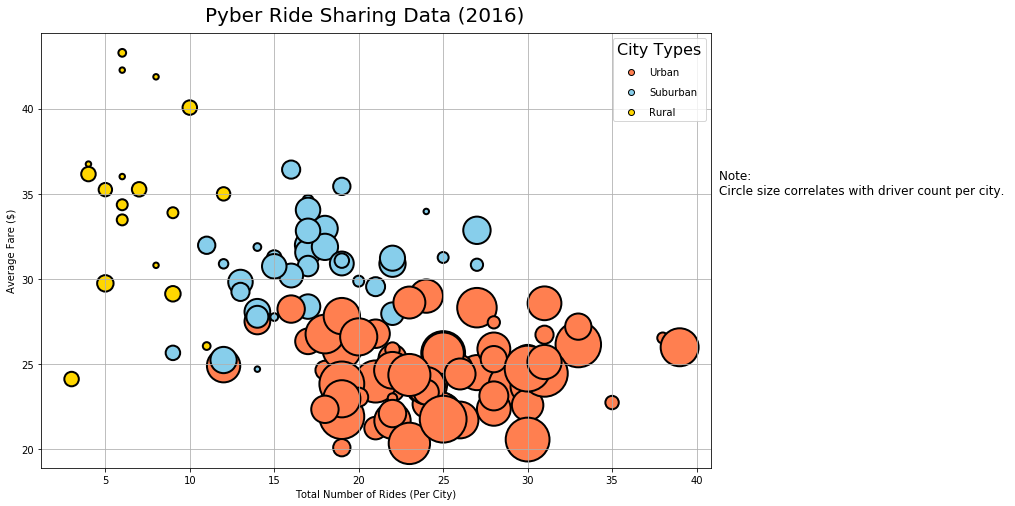

In [12]:
# Creating the plot

new_df.plot(kind = "scatter", x = "Total Number of Rides (Per City)", y = "Average Fare ($)", grid = True, figsize = (12,8),
              title = False, c = w, edgecolors = "black", s = z*30, linewidths = 2)


# Creating the appropriate Legend by plotting blank scatterplots

for city_type in ["Urban"]:
    plt.scatter([], [], c= ["Coral"], label= city_type, edgecolors = "black")
    
for city_type in ["Suburban"]:
    plt.scatter([], [], c= ["SkyBlue"], label= city_type, edgecolors = "black")

for city_type in ["Rural"]:
    plt.scatter([], [], c= ["Gold"], label= city_type, edgecolors = "black")
    
    
legend = plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='City Types')  
legend.get_title().set_fontsize('16')

# Making the note

textstr = "Note: \nCircle size correlates with driver count per city. "
plt.text(.91, .6, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Setting title this way to change font

plt.figtext(.5,.9,'Pyber Ride Sharing Data (2016)',fontsize=20,ha='center')


plt.show()


In [13]:
pyber_sum = df.groupby(["type"]).sum()
pyber_sum.head()

,driver_count,fare,ride_id
type,,,
Rural,537,4327.93,580968240341287
Suburban,8570,19356.33,3106884522576766
Urban,59602,39854.38,7919412664056093


In [14]:
rides_count = df.groupby(["type"]).count()
rides_count.head()

,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [15]:
#fares_count = df.groupby(["type"]).sum()
#fares_count.head()

In [16]:
# The values of each section of the pie chart
sizes_fares = pyber_sum["fare"]
sizes_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [17]:
# The values of each section of the pie chart
sizes_rides = rides_count["city"]
sizes_rides

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [18]:
# The values of each section of the pie chart
#sizes_drivers = df
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [19]:
# using the sorted-by-city (used to find v above), create a sorted by city dataframe
newdf = pd.DataFrame(by_city_sort)
newdf.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481
Barronchester,11,Suburban,2018-01-27 03:08:01,27.79,6653622887913
Bethanyland,22,Suburban,2018-04-01 22:04:35,38.71,8221076873967
Bradshawfurt,7,Rural,2018-03-06 21:44:53,19.74,6080367372860


In [20]:
# calculating number of drivers in urban cities
urban_counts = newdf.loc[newdf['type'] == 'Urban', ['driver_count']]
num_urb = urban_counts['driver_count'].sum()
num_urb

2405

In [21]:
# calculating number of drivers in suburban cities
suburban_counts = newdf.loc[newdf['type'] == 'Suburban', ['driver_count']]
num_sub = suburban_counts['driver_count'].sum()
num_sub

490

In [22]:
# calculating number of drivers in rural cities
rural_counts = newdf.loc[newdf['type'] == 'Rural', ['driver_count']]
num_rur = rural_counts['driver_count'].sum()
num_rur

78

In [23]:
# setting labels for the sections of pie chart
labels = ["Rural", "Suburban", "Urban"]

In [24]:
# setting colors of each section of pie chart
colors = ["gold", "skyblue", "coral"]

In [25]:
# exploding Urban section
explode = (0, 0, 0.2)

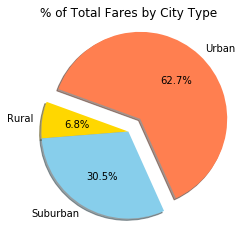

In [26]:
# building the pie charts
# piechart 1 - fares
plt.pie(sizes_fares, explode=explode, labels=labels, colors=colors, 
                       autopct="%1.1f%%", shadow=True, startangle=160,)

# assigning title
plt.title("% of Total Fares by City Type")
plt.show()

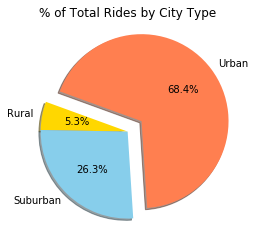

In [27]:
# piechart 2 - Rides
plt.pie(sizes_rides, explode=explode, labels=labels, colors=colors, 
                       autopct="%1.1f%%", shadow=True, startangle=160,)

plt.title("% of Total Rides by City Type")
plt.show()

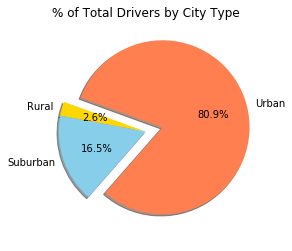

In [28]:
# piechart #3 - Drivers
plt.pie([num_rur, num_sub, num_urb], explode=explode, labels=labels, colors=colors, 
                       autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Drivers by City Type")
plt.show()